# Dataset Preparation & Analysis

## Import libraries
Import required libraries to run and access paramertized models, functions and complete project requirements. Ensure that sklearn, gensim, and nltk are installed on your machine.

In [8]:
import sklearn
import gensim
import nltk
import warnings
warnings.filterwarnings("ignore") # To suppress warning messages and keep interface clean

## Import and analyze dataset
Import required libraries to extract and split the dataset.

In [9]:
import gzip
import json
import numpy as np

Load the dataset and store in a numpy array for easier data manipulation.

In [11]:
file = json.load(gzip.open('goemotions.json.gz', 'r'))

data = np.asarray(file) # Store JSON file contents into a numpy array

Extract the posts and the 2 sets of labels (emotion and sentiment), then plot the distribution of the posts in each category and save the graphic (a histogram or pie chart) in pdf. This pre-analysis of the dataset will allow you to determine if the classes are balanced, and which metric is more appropriate to use to evaluate the performance of your classifiers.

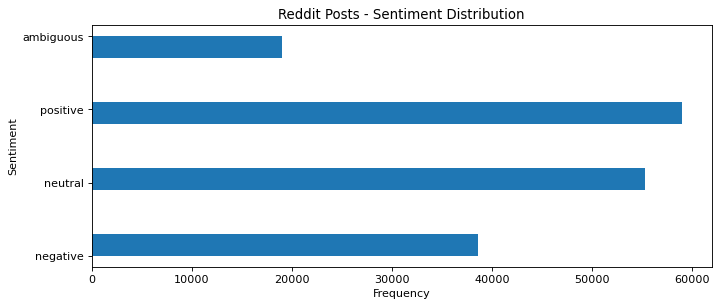

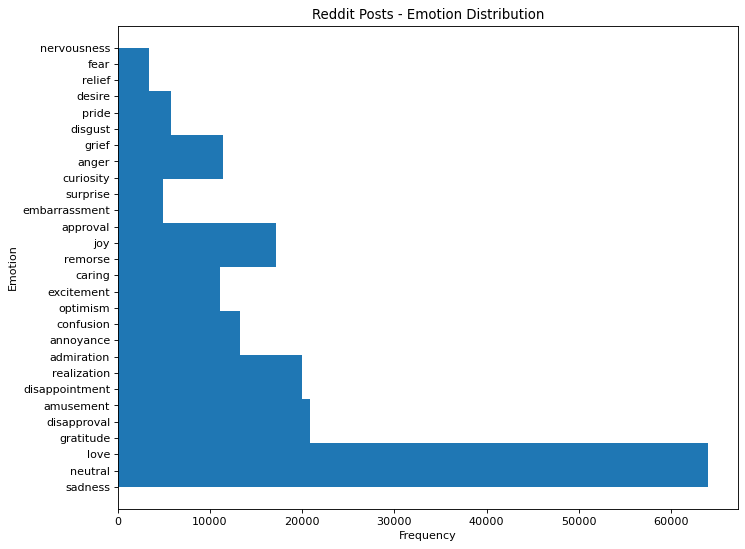

In [12]:
import matplotlib.pyplot as plt # Import matplotlib for graphing and data visualization

# Split data (features (X) and labels (y))
X_posts = data[:,0:1]
y_emotion = data[:,1:2]
y_sentiment = data[:,2:3]


# Sentiment Distribution
plt.figure(figsize=(10, 4), dpi=80)
plt.title('Reddit Posts - Sentiment Distribution')
plt.ylabel('Sentiment')
plt.xlabel('Frequency')
plt.hist(y_sentiment, orientation='horizontal')
plt.savefig('SentimentDistribution.pdf', dpi='figure')
plt.show()

# Emotion Distribution
plt.figure(figsize=(10, 8), dpi=80)
plt.title('Reddit Posts - Emotion Distribution')
plt.ylabel('Emotion')
plt.xlabel('Frequency')
plt.hist(y_emotion, orientation='horizontal')
plt.savefig('EmotionDistribution.pdf', dpi='figure')
plt.show()

# Word as Features
Let’s first use a classic word as features approach to text classification. The first step is to process the dataset by extracting the features (words) and display the size of the feature set, as well as determining the frequencies of said features.

In [13]:
from sklearn.feature_extraction.text import CountVectorizer

# Create CountVectorizer object and fit the X inputs to the object
vectorizer = CountVectorizer() 
X = vectorizer.fit_transform(X_posts.ravel())

# Display the magnitude of feature set (size of vocabulary)
print("Size of Vocabulary:",len(vectorizer.vocabulary_))

Size of Vocabulary: 30449


## Splitting the dataset
Next up, we will split the inputs and labels into training and test sets, 80% and 20% respectively.

In [14]:
from sklearn.model_selection import train_test_split

# Split into training and test sets for the emotion classifier
X_train_emotion, X_test_emotion, y_train_emotion, y_test_emotion = train_test_split(X, y_emotion, test_size=0.2)

# Split into training and test sets for the sentiment classifier
X_train_sentiment, X_test_sentiment, y_train_sentiment, y_test_sentiment = train_test_split(X, y_sentiment, 
                                                                                            test_size=0.2)

## Base Multinomial Naive Bayes Classifier
Here we will train a base multinomial naive bayes classifier with the default parameters selected. For each model we will print and store an indepth performance report (in the 'performance' file), that calculates the precision, recall and F1 evaluation metrics. We will also display a confusion matrix to help identify the model's classification strengths and weaknesses.

Emotion Classification Performance Report - Base Multinomial Naive Bayes Classifier
                precision    recall  f1-score   support

    admiration       0.46      0.44      0.45      2095
     amusement       0.55      0.29      0.38      1210
         anger       0.38      0.13      0.19      1012
     annoyance       0.20      0.07      0.11      1666
      approval       0.25      0.09      0.13      2252
        caring       0.38      0.06      0.11       750
     confusion       0.36      0.06      0.10       944
     curiosity       0.42      0.11      0.18      1129
        desire       0.50      0.05      0.08       415
disappointment       0.25      0.04      0.06       938
   disapproval       0.24      0.08      0.12      1522
       disgust       0.40      0.06      0.11       576
 embarrassment       0.64      0.03      0.05       258
    excitement       0.25      0.04      0.06       619
          fear       0.29      0.02      0.04       357
     gratitude     

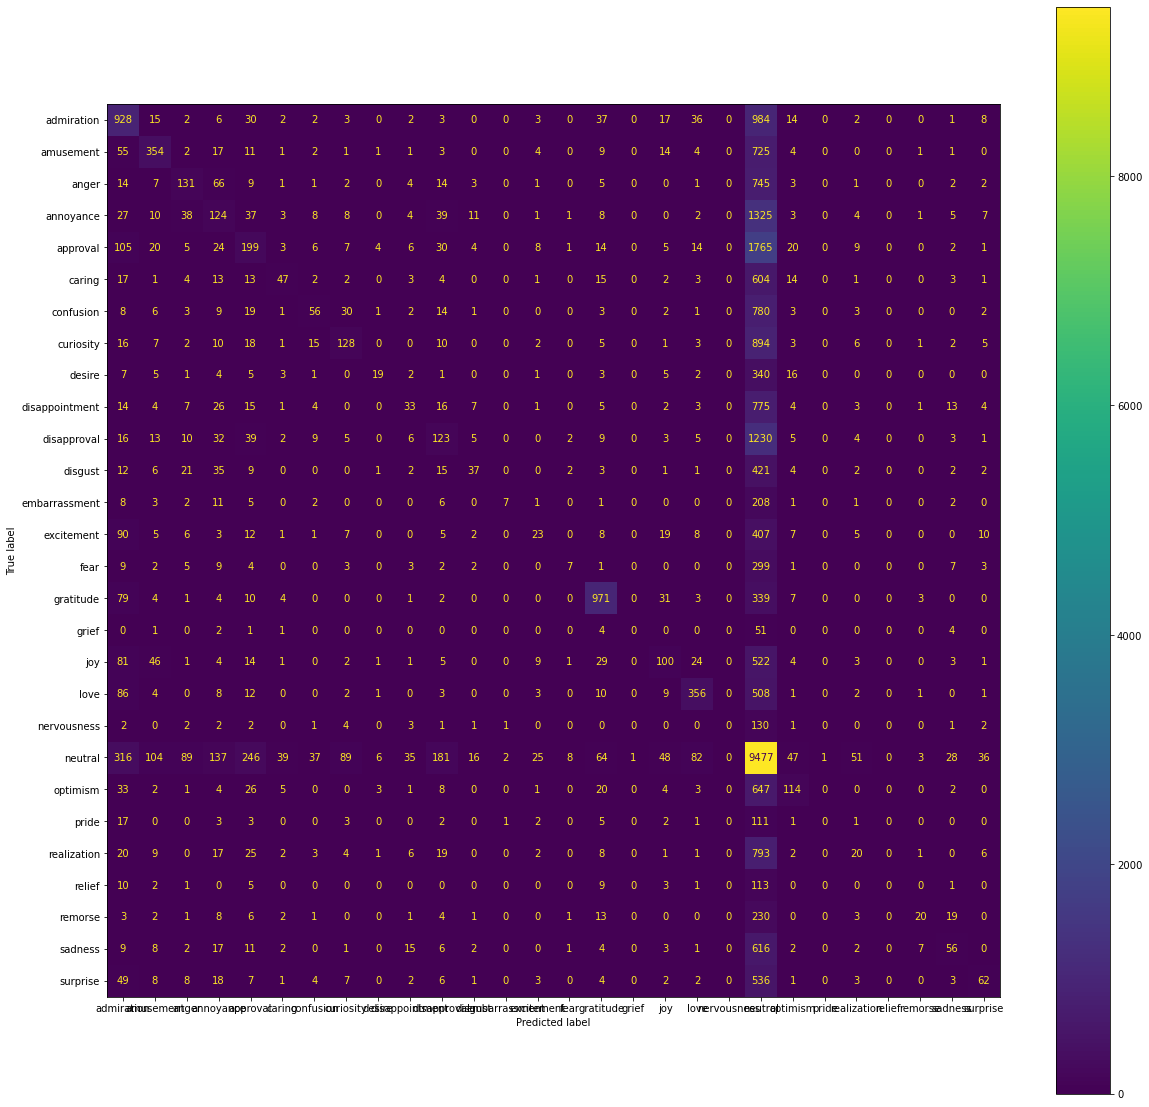

Sentiment Classification Performance Report - Base Multinomial Naive Bayes Classifier
              precision    recall  f1-score   support

   ambiguous       0.42      0.24      0.31      3805
    negative       0.53      0.53      0.53      7667
     neutral       0.49      0.49      0.49     11157
    positive       0.62      0.71      0.66     11735

    accuracy                           0.55     34364
   macro avg       0.52      0.49      0.50     34364
weighted avg       0.54      0.55      0.54     34364



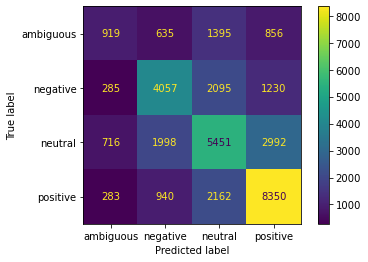

In [7]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Emotion Classification 
baseMNB_model = MultinomialNB() 
baseMNB_model.fit(X_train_emotion, y_train_emotion.ravel()) # Training step
print("Emotion Classification Performance Report - Base Multinomial Naive Bayes Classifier")
prediction =  baseMNB_model.predict(X_test_emotion)
print(classification_report(y_test_emotion,prediction))
cm = confusion_matrix(y_test_emotion, prediction, labels=baseMNB_model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=baseMNB_model.classes_)
fig, ax = plt.subplots(figsize = (20, 20))
disp.plot(ax=ax)
plt.show()


# Sentiment Classification 
baseMNB_model = MultinomialNB() 
baseMNB_model.fit(X_train_sentiment, y_train_sentiment.ravel()) # Training step
print("Sentiment Classification Performance Report - Base Multinomial Naive Bayes Classifier")
prediction = baseMNB_model.predict(X_test_sentiment)
print(classification_report(y_test_sentiment, prediction))
cm = confusion_matrix(y_test_sentiment, prediction, labels=baseMNB_model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=baseMNB_model.classes_)
disp.plot()
plt.show()

## Base Decision Tree Classifier 
Here we will train a base decision tree classifier with the default parameters selected. For each model we will print and store an indepth performance report (in the 'performance' file), that calculates the precision, recall and F1 evaluation metrics. We will also display a confusion matrix to help identify the model's classification strengths and weaknesses.

Emotion Classification Performance Report - Base Decision Tree Classifier
                precision    recall  f1-score   support

    admiration       0.40      0.57      0.47      2095
     amusement       0.41      0.57      0.48      1210
         anger       0.23      0.37      0.29      1012
     annoyance       0.15      0.21      0.17      1666
      approval       0.19      0.26      0.22      2252
        caring       0.22      0.25      0.23       750
     confusion       0.21      0.29      0.24       944
     curiosity       0.31      0.35      0.33      1129
        desire       0.24      0.28      0.26       415
disappointment       0.15      0.18      0.17       938
   disapproval       0.24      0.23      0.24      1522
       disgust       0.24      0.20      0.22       576
 embarrassment       0.19      0.19      0.19       258
    excitement       0.20      0.20      0.20       619
          fear       0.38      0.30      0.34       357
     gratitude       0.77    

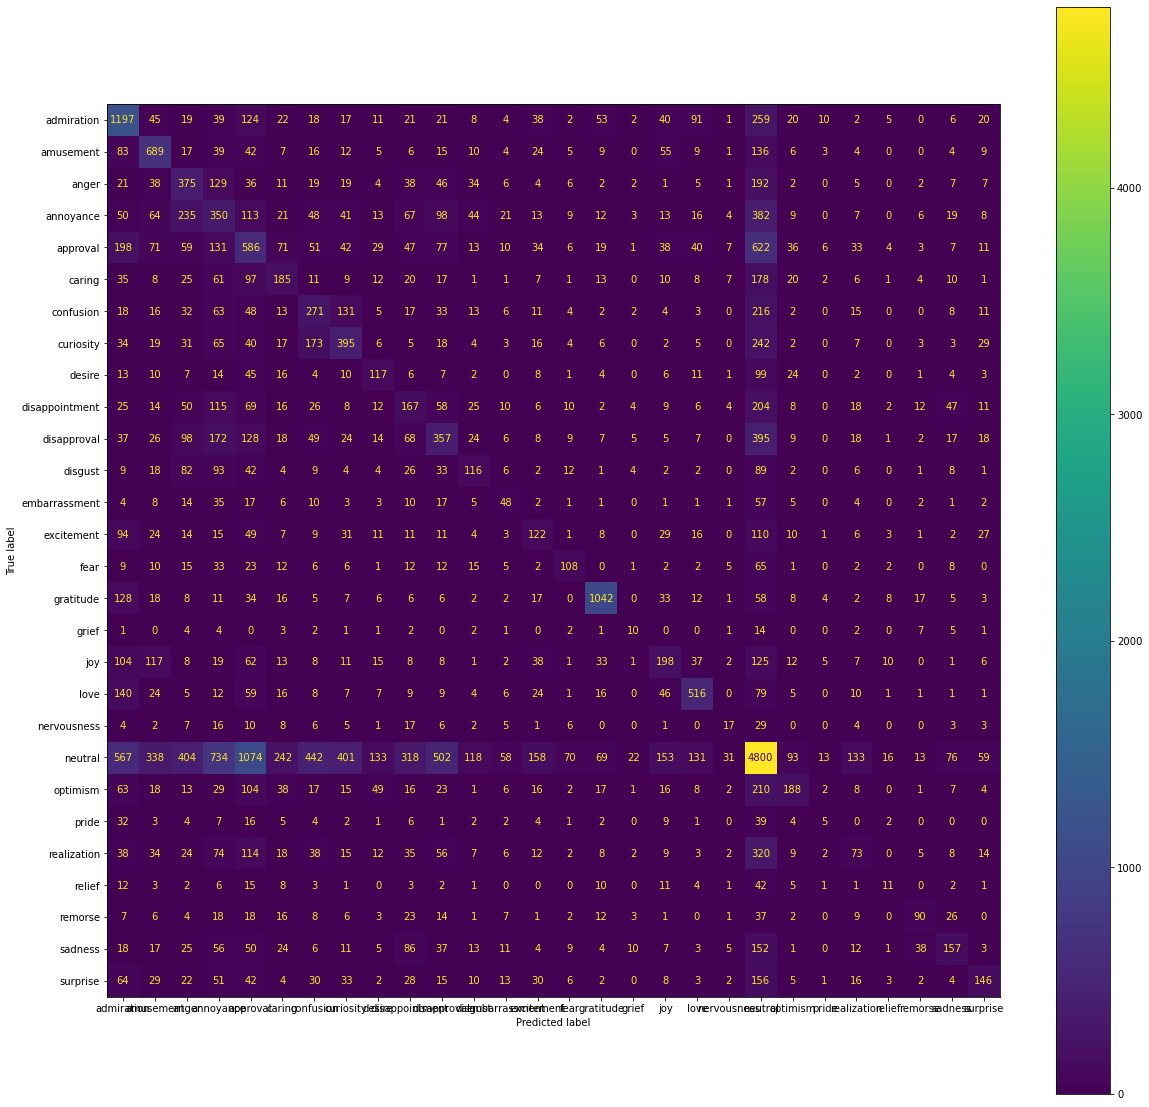

Sentiment Classification Performance Report - Base Decision Tree Classifier
              precision    recall  f1-score   support

   ambiguous       0.36      0.48      0.41      3805
    negative       0.50      0.60      0.55      7667
     neutral       0.51      0.47      0.49     11157
    positive       0.70      0.59      0.64     11735

    accuracy                           0.54     34364
   macro avg       0.52      0.53      0.52     34364
weighted avg       0.56      0.54      0.55     34364



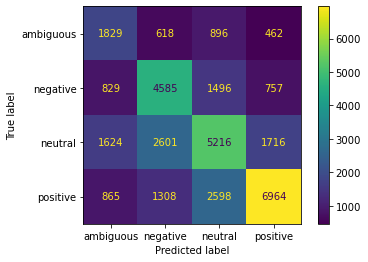

In [8]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Emotion Classification 
baseDT_model = DecisionTreeClassifier() 
baseDT_model.fit(X_train_emotion, y_train_emotion.ravel()) # Training step
print("Emotion Classification Performance Report - Base Decision Tree Classifier")
prediction = baseDT_model.predict(X_test_emotion)
print(classification_report(y_test_emotion, prediction))
cm = confusion_matrix(y_test_emotion, prediction, labels=baseDT_model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=baseDT_model.classes_)
fig, ax = plt.subplots(figsize = (20, 20))
disp.plot(ax=ax)
plt.show()

# Sentiment Classification 
baseDT_model = DecisionTreeClassifier()
baseDT_model.fit(X_train_sentiment, y_train_sentiment.ravel()) # Training step
print("Sentiment Classification Performance Report - Base Decision Tree Classifier")
prediction = baseDT_model.predict(X_test_sentiment)
print(classification_report(y_test_sentiment, prediction))
cm = confusion_matrix(y_test_sentiment, prediction, labels=baseDT_model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=baseDT_model.classes_)
disp.plot()
plt.show()

For each model we will print and store an indepth performance report (in the 'performance' file), that calculates the precision, recall and F1 evaluation metrics. We will also display a confusion matrix to help identify the model's classification strengths and weaknesses.

## Base Multi-Layered Perceptron Classifier
Here we will train a base multi-layered perceptron classifier with the default parameters selected.

Emotion Classification Performance Report - Base Multi-Layered Perceptron Classifier
                precision    recall  f1-score   support

    admiration       0.53      0.49      0.51      2095
     amusement       0.54      0.62      0.58      1210
         anger       0.40      0.23      0.29      1012
     annoyance       0.22      0.04      0.06      1666
      approval       0.38      0.06      0.11      2252
        caring       0.41      0.09      0.14       750
     confusion       0.36      0.08      0.13       944
     curiosity       0.43      0.09      0.15      1129
        desire       0.48      0.22      0.30       415
disappointment       0.34      0.03      0.05       938
   disapproval       0.24      0.07      0.11      1522
       disgust       0.41      0.16      0.23       576
 embarrassment       0.47      0.03      0.05       258
    excitement       0.53      0.07      0.12       619
          fear       0.58      0.20      0.30       357
     gratitude    

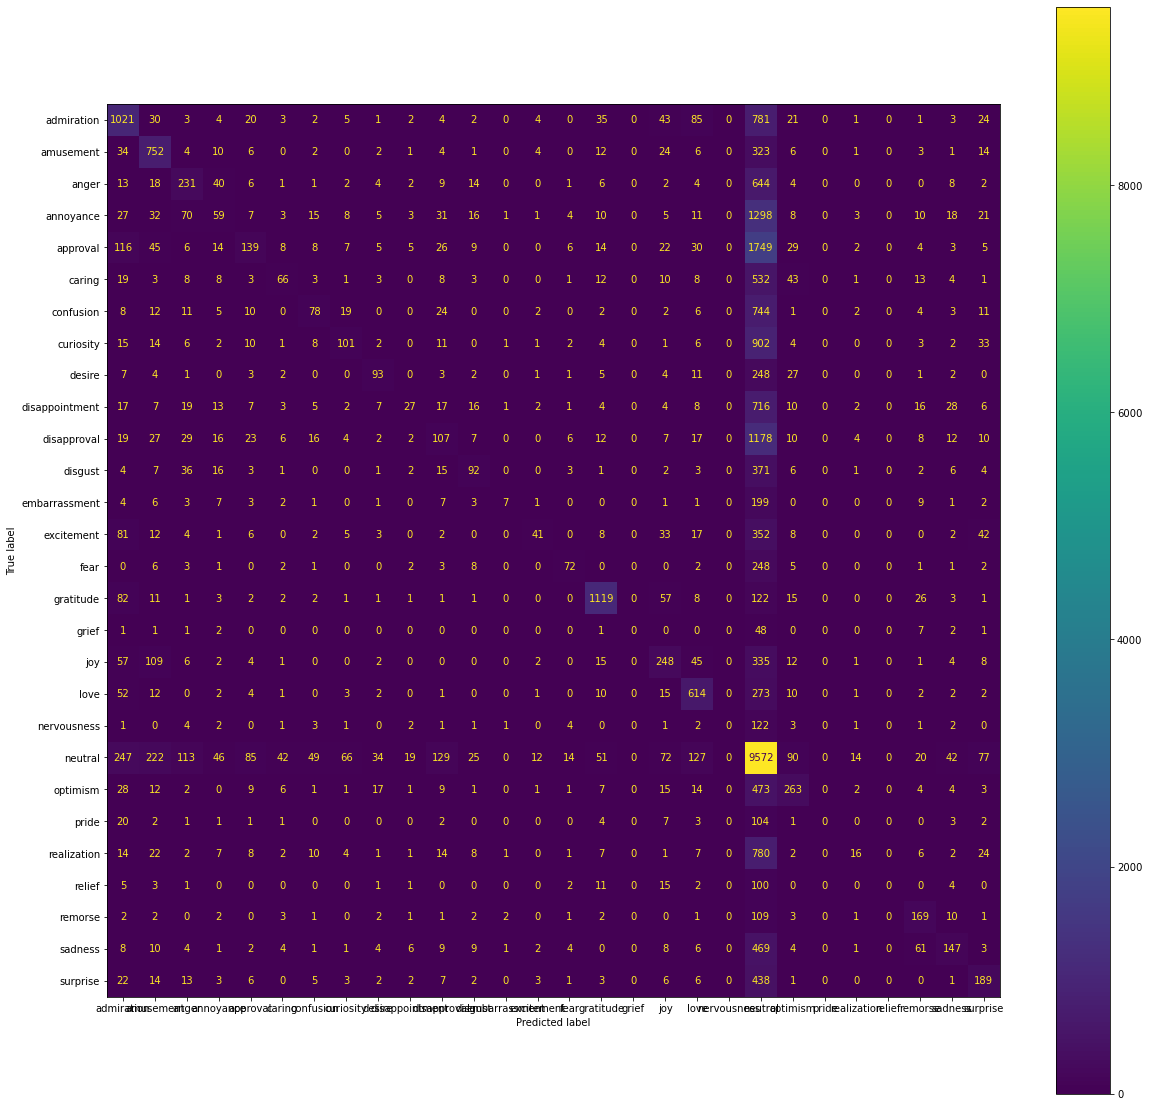

Sentiment Classification Performance Report - Base Multi-Layered Perceptron Classifier
              precision    recall  f1-score   support

   ambiguous       0.39      0.39      0.39      3805
    negative       0.53      0.55      0.54      7667
     neutral       0.51      0.48      0.49     11157
    positive       0.65      0.67      0.66     11735

    accuracy                           0.55     34364
   macro avg       0.52      0.52      0.52     34364
weighted avg       0.55      0.55      0.55     34364



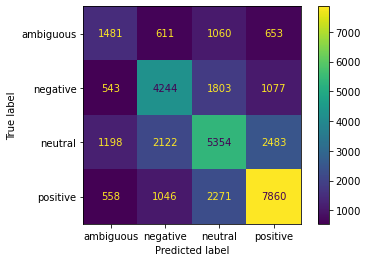

In [9]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Emotion Classification 
baseMLP_model = MLPClassifier(max_iter=1) 
baseMLP_model.fit(X_train_emotion, y_train_emotion.ravel()) # Training step
print("Emotion Classification Performance Report - Base Multi-Layered Perceptron Classifier")
prediction = baseMLP_model.predict(X_test_emotion)
print(classification_report(y_test_emotion, prediction))
cm = confusion_matrix(y_test_emotion, prediction, labels=baseMLP_model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=baseMLP_model.classes_)
fig, ax = plt.subplots(figsize = (20, 20))
disp.plot(ax=ax)
plt.show()

# Sentiment Classification 
baseMLP_model = MLPClassifier()
baseMLP_model.fit(X_train_sentiment, y_train_sentiment.ravel()) # Training step
print("Sentiment Classification Performance Report - Base Multi-Layered Perceptron Classifier")
prediction = baseMLP_model.predict(X_test_sentiment)
print(classification_report(y_test_sentiment, prediction))
cm = confusion_matrix(y_test_sentiment, prediction, labels=baseMLP_model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=baseMLP_model.classes_)
disp.plot()
plt.show()

## Top Multinomial Naive Bayes Classifier
A better performing Multinomial Naive Bayes Classifier found using GridSearchCV.
The gridsearch will allow you to find the best combination of hyper-parameters, as determined
by the evaluation function.

In [10]:
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import MultinomialNB

# Grid search best alphafloat value
MNB_model = MultinomialNB()
hyper_parameters = {'alpha':(0, 0.5, 1, 1.5, 2, 2.5)}

gridSearchMNB = GridSearchCV(MNB_model, hyper_parameters, n_jobs=-1, scoring='f1_weighted')

# Print the best found hyperparameter configuration and validation accuracy for emotion classification
gridSearchMNB.fit(X_train_emotion, y_train_emotion.ravel())
print('Top Multinomial Naive Bayes Classifier [EMOTION] Best Hyperparameter Configuration:', gridSearchMNB.best_params_)

# Print the best found hyperparameter configuration and validation accuracy for sentiment classification
gridSearchMNB.fit(X_train_sentiment, y_train_sentiment.ravel())
print('Top Multinomial Naive Bayes Classifier [SENTIMENT] Best Hyperparameter Configuration:', gridSearchMNB.best_params_)

Top Multinomial Naive Bayes Classifier [EMOTION] Best Hyperparameter Configuration: {'alpha': 0}
Top Multinomial Naive Bayes Classifier [SENTIMENT] Best Hyperparameter Configuration: {'alpha': 0.5}


Emotion Classification Performance Report - Top Multinomial Naive Bayes Classifier
                precision    recall  f1-score   support

    admiration       0.46      0.50      0.48      2095
     amusement       0.46      0.53      0.49      1210
         anger       0.28      0.32      0.30      1012
     annoyance       0.17      0.12      0.14      1666
      approval       0.23      0.15      0.19      2252
        caring       0.22      0.29      0.25       750
     confusion       0.23      0.24      0.24       944
     curiosity       0.29      0.29      0.29      1129
        desire       0.24      0.30      0.26       415
disappointment       0.16      0.14      0.15       938
   disapproval       0.21      0.19      0.20      1522
       disgust       0.22      0.24      0.23       576
 embarrassment       0.15      0.24      0.19       258
    excitement       0.18      0.17      0.18       619
          fear       0.31      0.33      0.32       357
     gratitude      

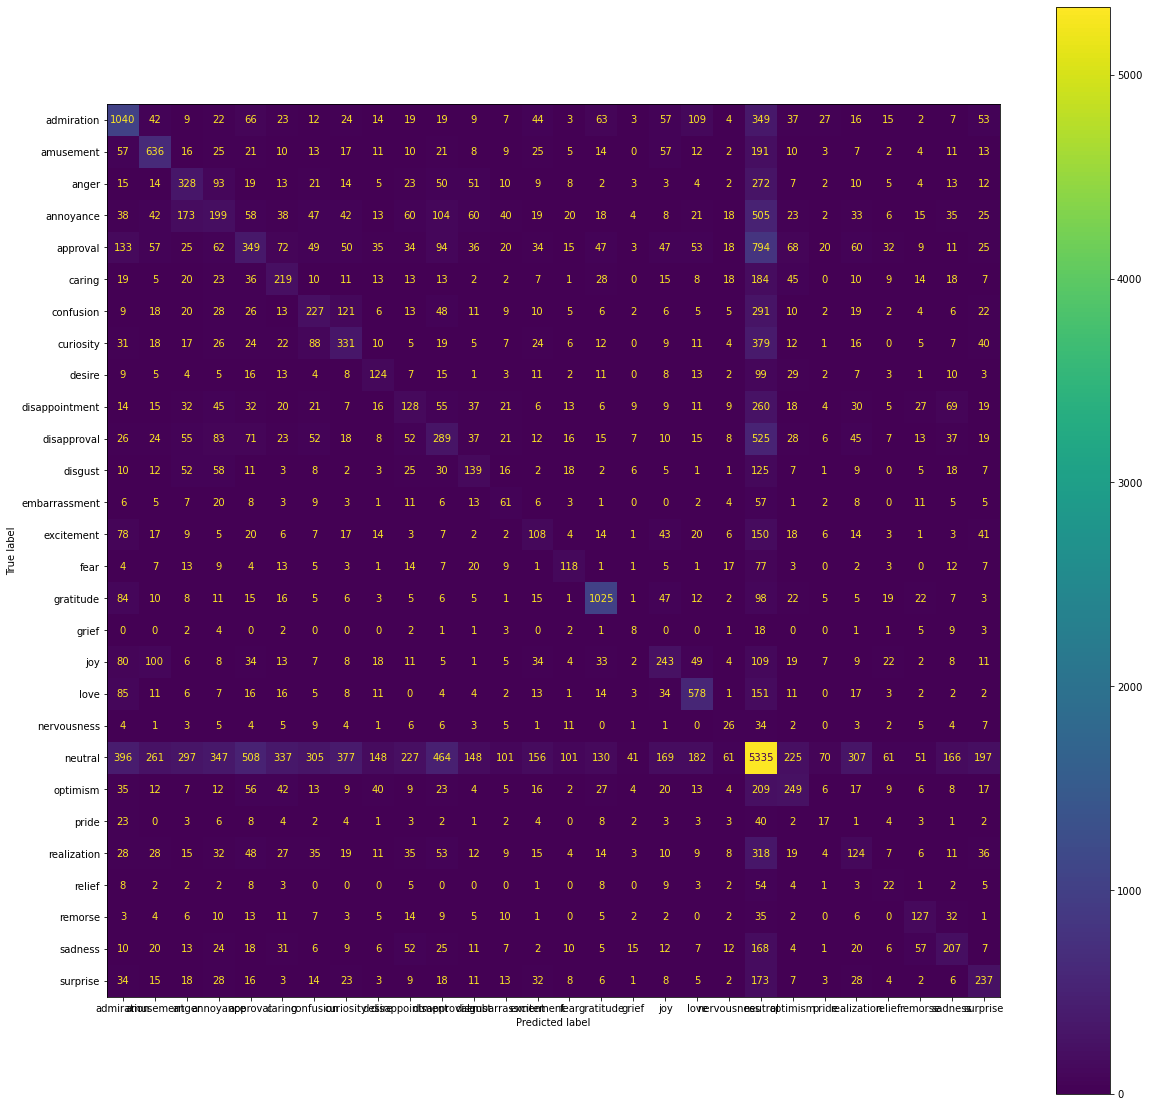

Sentiment Classification Performance Report - Top Multinomial Naive Bayes Classifier
              precision    recall  f1-score   support

   ambiguous       0.40      0.30      0.34      3805
    negative       0.53      0.54      0.54      7667
     neutral       0.50      0.47      0.48     11157
    positive       0.63      0.70      0.66     11735

    accuracy                           0.55     34364
   macro avg       0.51      0.50      0.51     34364
weighted avg       0.54      0.55      0.54     34364



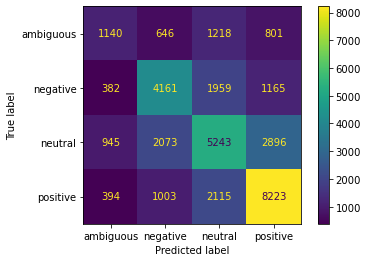

In [11]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Emotion Classification
topMNB_model = MultinomialNB(alpha=0)
topMNB_model.fit(X_train_emotion, y_train_emotion.ravel()) # Training step
print("Emotion Classification Performance Report - Top Multinomial Naive Bayes Classifier")
prediction = topMNB_model.predict(X_test_emotion)
print(classification_report(y_test_emotion, prediction))
cm = confusion_matrix(y_test_emotion, prediction, labels=topMNB_model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=topMNB_model.classes_)
fig, ax = plt.subplots(figsize = (20, 20))
disp.plot(ax=ax)
plt.show()

# Sentiment Classification 
topMNB_model = MultinomialNB(alpha=0.5)
topMNB_model.fit(X_train_sentiment, y_train_sentiment.ravel()) # Training step
print("Sentiment Classification Performance Report - Top Multinomial Naive Bayes Classifier")
prediction = topMNB_model.predict(X_test_sentiment)
print(classification_report(y_test_sentiment, prediction))
cm = confusion_matrix(y_test_sentiment, prediction, labels=topMNB_model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=topMNB_model.classes_)
disp.plot()
plt.show()

## Top Decision Tree Classifier
A better performing Decision Tree Classifier found using GridSearchCV. The gridsearch will allow you to find the best combination of hyper-parameters, as determined by the evaluation function.

In [12]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

# Grid search best set of hyperparameters 
DT_model = DecisionTreeClassifier()
hyper_parameters = {'criterion':('gini','entropy'),'max_depth':(10,15,20,25,30,50, None), 'min_samples_split':(2,3,5)}

gridSearchDT = GridSearchCV(DT_model, hyper_parameters, n_jobs=-1, scoring='f1_weighted')

# Print the best found hyperparameter configuration and validation accuracy for emotion classification
gridSearchDT.fit(X_train_emotion, y_train_emotion.ravel())
print('Top Decision Tree Classifier [EMOTION] Best Hyperparameter Configuration:', gridSearchDT.best_params_)

# Print the best found hyperparameter configuration and validation accuracy for sentiment classification
gridSearchDT.fit(X_train_sentiment, y_train_sentiment.ravel())
print('Top Decision Tree Classifier [SENTIMENT] Best Hyperparameter Configuration:', gridSearchDT.best_params_)

Top Decision Tree Classifier [EMOTION] Best Hyperparameter Configuration: {'criterion': 'gini', 'max_depth': None, 'min_samples_split': 2}
Top Decision Tree Classifier [SENTIMENT] Best Hyperparameter Configuration: {'criterion': 'gini', 'max_depth': None, 'min_samples_split': 2}


Emotion Classification Performance Report - Top Decision Tree Classifier
                precision    recall  f1-score   support

    admiration       0.41      0.57      0.48      2116
     amusement       0.45      0.58      0.51      1277
         anger       0.25      0.38      0.31      1068
     annoyance       0.16      0.23      0.19      1690
      approval       0.20      0.26      0.22      2234
        caring       0.23      0.28      0.25       717
     confusion       0.22      0.28      0.24       973
     curiosity       0.32      0.33      0.33      1198
        desire       0.24      0.27      0.25       416
disappointment       0.15      0.18      0.16       941
   disapproval       0.24      0.24      0.24      1473
       disgust       0.25      0.23      0.24       566
 embarrassment       0.21      0.17      0.19       276
    excitement       0.22      0.21      0.22       603
          fear       0.35      0.33      0.34       362
     gratitude       0.74     

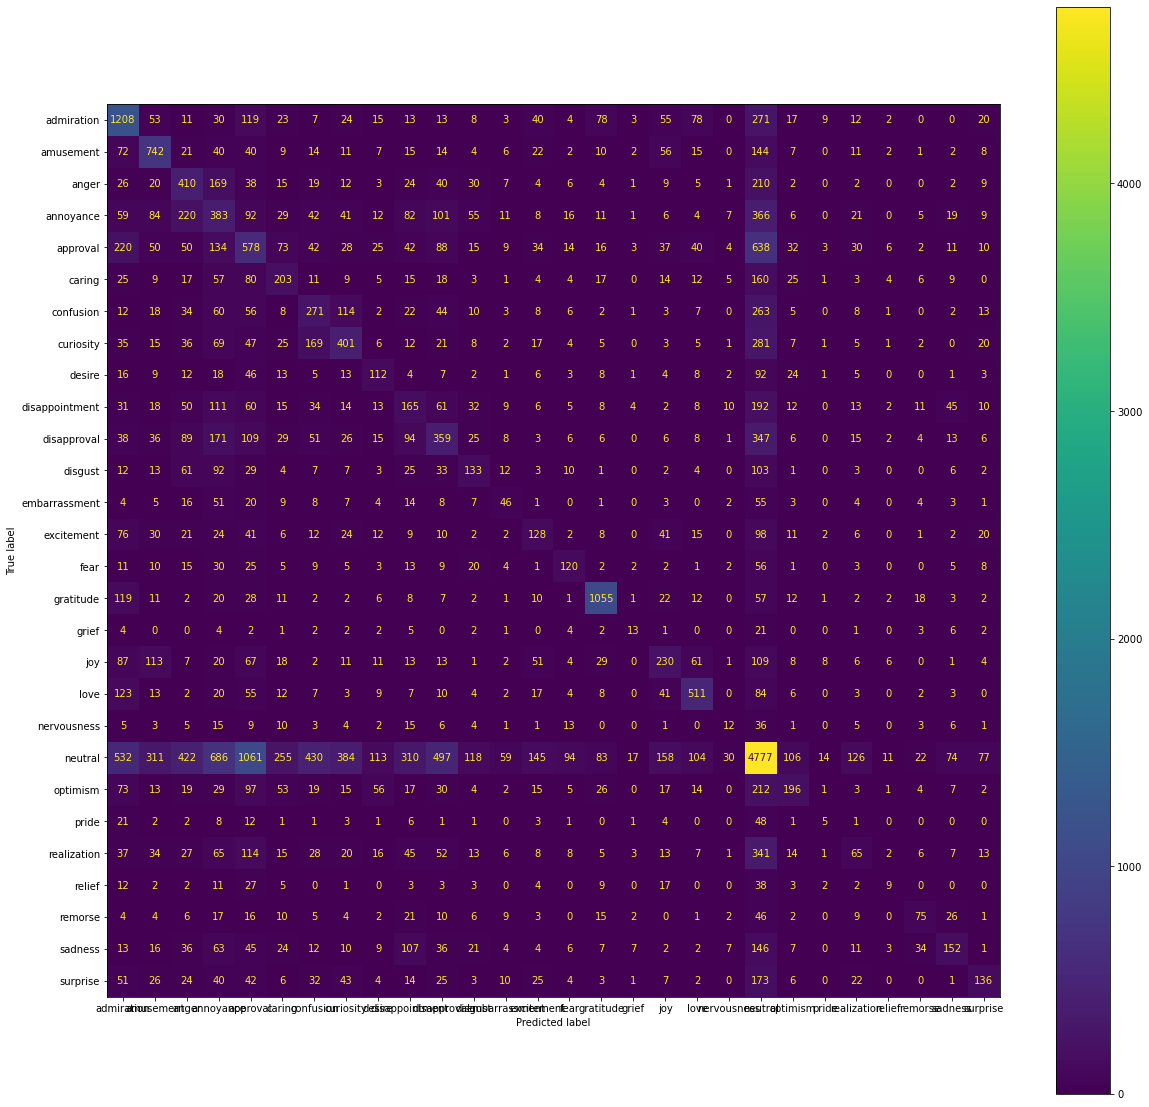

Sentiment Classification Performance Report - Top Decision Tree Classifier
              precision    recall  f1-score   support

   ambiguous       0.36      0.48      0.41      3763
    negative       0.50      0.60      0.55      7682
     neutral       0.51      0.47      0.49     11049
    positive       0.71      0.60      0.65     11870

    accuracy                           0.54     34364
   macro avg       0.52      0.54      0.52     34364
weighted avg       0.56      0.54      0.55     34364



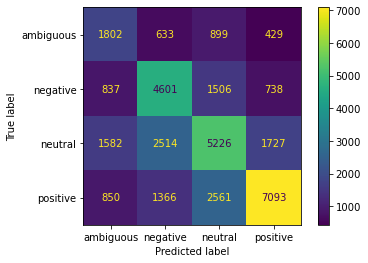

In [20]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Emotion Classification 
topDT_model = DecisionTreeClassifier(criterion='gini',max_depth=None,min_samples_split=2) 
topDT_model.fit(X_train_emotion, y_train_emotion.ravel()) # Training step
print("Emotion Classification Performance Report - Top Decision Tree Classifier")
prediction = topDT_model.predict(X_test_emotion)
print(classification_report(y_test_emotion, prediction))
cm = confusion_matrix(y_test_emotion, prediction, labels=topDT_model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=topDT_model.classes_)
fig, ax = plt.subplots(figsize = (20, 20))
disp.plot(ax=ax)
plt.show()

# Sentiment Classification 

# Note that no change in hyperparameter configuration, so the 'best' performing model is equivalent to base model.
topDT_model = DecisionTreeClassifier(criterion='gini',max_depth=None,min_samples_split=2) 
topDT_model.fit(X_train_sentiment, y_train_sentiment.ravel()) # Training step
print("Sentiment Classification Performance Report - Top Decision Tree Classifier")
prediction = topDT_model.predict(X_test_sentiment)
print(classification_report(y_test_sentiment, prediction))
cm = confusion_matrix(y_test_sentiment, prediction, labels=topDT_model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=topDT_model.classes_)
disp.plot()
plt.show()

## Top Multi-Layered Perceptron Classifier
A better performing multi-layered perceptron found using GridSearchCV.

In [14]:
from sklearn.model_selection import GridSearchCV

# Grid search best set of hyperparameters
MLP_model = MLPClassifier(max_iter=1)
hyper_parameters = {'activation':('logistic','tanh','relu','identity'),
                    'solver':('sgd', 'adam'), 'hidden_layer_sizes':((10,10,10),(30,50))}

gridSearchMLP = GridSearchCV(MLP_model, hyper_parameters, n_jobs=-1, scoring='f1_weighted')

# Print the best found hyperparameter configuration and validation f1_weighted for emotion classification
gridSearchMLP.fit(X_train_emotion, y_train_emotion.ravel())
print('Top Multi-Layered Perceptron Classifier [EMOTION] Best Hyperparameter Configuration:', gridSearchMLP.best_params_)

# Print the best found hyperparameter configuration and validation f1_weighted for sentiment classification
gridSearchMLP.fit(X_train_sentiment, y_train_sentiment.ravel())
print('Top Multi-Layered Perceptron Classifier [SENTIMENT] Best Hyperparameter Configuration:', gridSearchMLP.best_params_)

Top Multi-Layered Perceptron Classifier [EMOTION] Best Hyperparameter Configuration: {'activation': 'identity', 'hidden_layer_sizes': (30, 50), 'solver': 'adam'}
Top Multi-Layered Perceptron Classifier [SENTIMENT] Best Hyperparameter Configuration: {'activation': 'relu', 'hidden_layer_sizes': (30, 50), 'solver': 'adam'}


Emotion Classification Performance Report - Top Multi-Layered Perceptron Classifier
                precision    recall  f1-score   support

    admiration       0.55      0.48      0.51      2116
     amusement       0.56      0.51      0.53      1277
         anger       0.33      0.24      0.27      1068
     annoyance       0.21      0.03      0.05      1690
      approval       0.44      0.04      0.07      2234
        caring       0.24      0.07      0.11       717
     confusion       0.48      0.06      0.10       973
     curiosity       0.43      0.10      0.16      1198
        desire       0.44      0.19      0.26       416
disappointment       0.56      0.01      0.02       941
   disapproval       0.21      0.06      0.09      1473
       disgust       0.43      0.16      0.23       566
 embarrassment       0.00      0.00      0.00       276
    excitement       0.49      0.05      0.10       603
          fear       0.61      0.21      0.32       362
     gratitude     

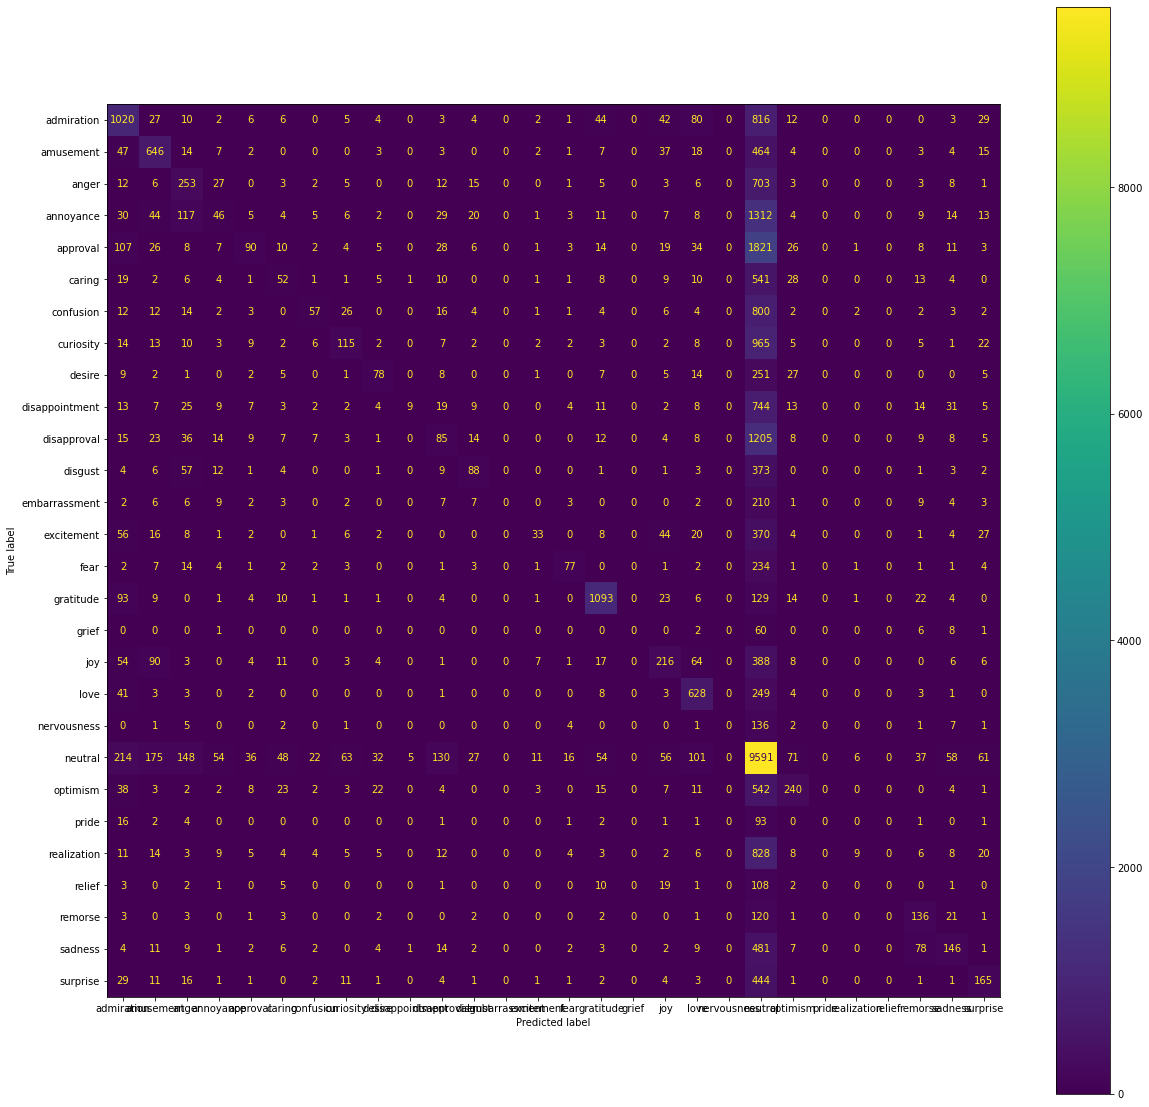

Sentiment Classification Performance Report - Top Multi-Layered Perceptron Classifier
              precision    recall  f1-score   support

   ambiguous       0.46      0.20      0.28      3763
    negative       0.57      0.52      0.54      7682
     neutral       0.48      0.62      0.54     11049
    positive       0.70      0.67      0.68     11870

    accuracy                           0.57     34364
   macro avg       0.55      0.50      0.51     34364
weighted avg       0.57      0.57      0.56     34364



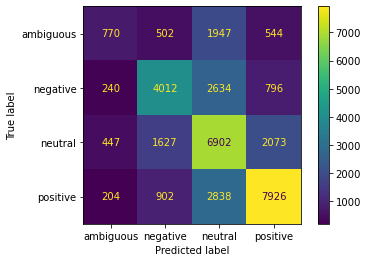

In [18]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Emotion Classification 
topMLP_model = MLPClassifier(max_iter=1, hidden_layer_sizes=(30,50), activation='identity', solver='adam')
topMLP_model.fit(X_train_emotion, y_train_emotion.ravel()) # Training step
print("Emotion Classification Performance Report - Top Multi-Layered Perceptron Classifier")
prediction = topMLP_model.predict(X_test_emotion)
print(classification_report(y_test_emotion, prediction))
cm = confusion_matrix(y_test_emotion, prediction, labels=topMLP_model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=topMLP_model.classes_)
fig, ax = plt.subplots(figsize = (20, 20))
disp.plot(ax=ax)
plt.show()

# Sentiment Classification 
topMLP_model = MLPClassifier(max_iter=1, hidden_layer_sizes=(30,50), activation='relu', solver='adam')
topMLP_model.fit(X_train_sentiment, y_train_sentiment.ravel()) # Training step
print("Sentiment Classification Performance Report - Top Multi-Layered Perceptron Classifier")
prediction = topMLP_model.predict(X_test_sentiment)
print(classification_report(y_test_sentiment, prediction))
cm = confusion_matrix(y_test_sentiment, prediction, labels=topMLP_model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=topMLP_model.classes_)
disp.plot()
plt.show()